**Name:** \_\_\_\_\_Huanchen Wang\_\_\_\_\_

**EID:** \_\_\_\_\_57558749\_\_\_\_\_

# CS5489 - Tutorial 6
## Dimensionality Reduction and Face Recognition

In this tutorial you will use linear and non-linear dimensionality reduction on face images, and then train a classifier for face recognition. In the second part, you will then use dimensionality reduction for de-noising.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import glob
import os
random.seed(100)
rbow = plt.get_cmap('rainbow')

## Loading Data and Pre-processing
We first need to load the images.  Download `olivetti_py3.pkz` from Canvas, and place it in in the same directory as this ipynb file.  _DO NOT UNZIP IT_.  Then run the following cell to load the images.

In [2]:
oli = datasets.fetch_olivetti_faces(data_home="./")
X = oli.data.astype('float')
Y = oli.target
img = oli.images
imgsize = oli.images[0].shape

Each image is a 64x64 array of pixel values, resulting in a 4096 dimensional vector.  Run the below code to show an example:

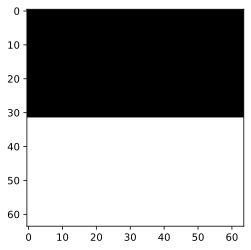

In [140]:
plt.imshow(vstack((zeros((32,64)), ones((32,64)))),cmap='gray',interpolation='nearest')

(64, 64)


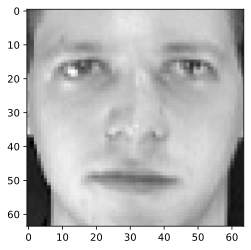

In [3]:
print(img[0].shape)
plt.imshow(img[0], cmap='gray', interpolation='nearest')
plt.show()

Run the below code to show all the images!

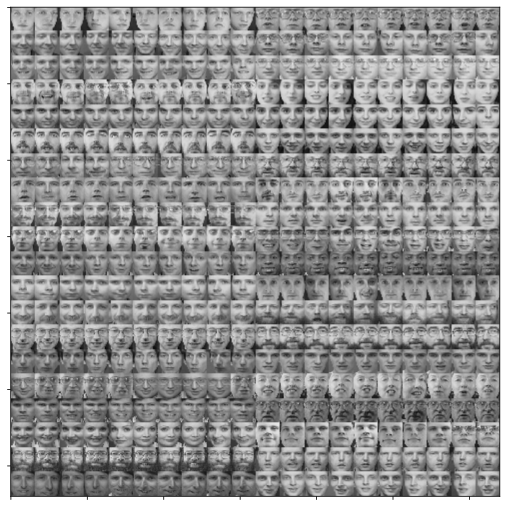

In [4]:
tmp = []
for i in range(0,400,20):
    tmp.append( hstack(img[i:i+20]) )
allimg = vstack(tmp)
plt.figure(figsize=(9,9))
plt.imshow(allimg, cmap='gray', interpolation='nearest')
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.show()

Each person is considered as one class, and there are 10 images for each class.  In total there are 40 classes (people).  The data is already vectorized and put into the matrix `X`. The class labels are in vector `Y`. Now we split the data into training and testing sets.

In [5]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  model_selection.train_test_split(X, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainX.shape)
print(testX.shape)

(320, 4096)
(80, 4096)


# Linear Dimensionality Reduction - PCA
The dimension of the data is too large (4096) so learning classifiers will take a long time.  Instead, our strategy is to use PCA to reduce the dimension first and then use the PCA weights as the representation for each image.  Run PCA oon the data using 9 principal components.

In [ ]:
### INSERT YOUR CODE HERE

In [10]:
pca = decomposition.PCA(n_components=9)
pca.fit(trainX)


PCA(n_components=9)

The below function will plot the basis vectors of PCA. Run the next 2 cells to view the PCs.

In [7]:
def plot_basis(model, imgsize):
    cname = model.__class__.__name__
    if  cname == 'LDA':
        KK = model.n_components
        comps = model.coef_
        mn    = None
    elif cname == 'PCA':
        KK = model.n_components_
        comps = model.components_
        mn    = model.mean_
    elif cname == 'NMF':
        KK = model.n_components_
        comps = model.components_
        mn    = None
    K = KK
    if mn is not None:
        K += 1        
    nr = int(ceil(K/5.0))
    sind = 1

    #vmin = comps.flatten().min()
    #vmax = comps.flatten().max()
    
    # plot the mean
    pcfig = plt.figure(figsize=(8,nr*2))
    if mn is not None:
        plt.subplot(nr,5,sind)
        plt.imshow(mn.reshape(imgsize), interpolation='nearest')
        plt.title("mean")
        plt.gray()
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])    
        sind += 1
    # plot the components
    for j in range(0,KK):
        plt.subplot(nr,5,sind)
        v = comps[j,:]            
        I = v.reshape(imgsize)
        plt.imshow(I, interpolation='nearest')
        plt.gray()
        plt.title("basis " + str(j+1))
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])
        sind += 1

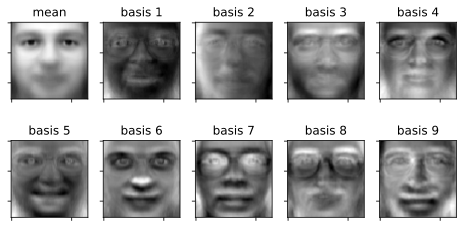

In [8]:
# run the function
plot_basis(pca, imgsize)

_What do the basis images look like? Do some basis images correspond to particular facial features?_
- **INSERT YOUR ANSWER HERE**

To each basis images:

- Basis images 1 and 7 focus on eye
- Basis image 3 and 8 focus more on eyebrow
- Basis image 4 and 6 focus more on nose and mouth
- Basis image 2, 5, 9 are more general


## Face Recognition
Now train a _linear_ classifier to do the face recognition.  Use the calculated PCA representation as the new set of inputs.  Use cross-validation to set the hyperparameters of the classifier.  _You do not need to do cross-validation for the number of components._  Calculate the average training and testing accuracies.  Remember to transform the test data into the PCA representation too!

**NOTE**: It is **NOT** recommended to use `svm.SVC` for the training.  This is because the default SVC implements 1-vs-1 multi-class classification, which means it will calculate 40x39=1560 classifiers!  All other classifier should be fine since they do 1-vs-all multi-class classification, e.g., LogisticRegressionCV, LinearSVC, etc.  If you want to use svm.SVC, make sure to use the OneVsRestClassifier as shown in Lecture 3.

In [ ]:
### INSERT YOUR CODE HERE

In [16]:
pca = decomposition.PCA(n_components=9)
pca.fit(trainX)
trainXpca = pca.transform(trainX)
testXpca = pca.transform(testX)

paragrid_lr = {'C': logspace(-3,3,6)}
lr_cv = model_selection.GridSearchCV(linear_model.LogisticRegression(max_iter=1000), paragrid_lr, cv=5)
lr_cv.fit(trainXpca, trainY)
print(lr_cv.best_params_)
print('train accuracy: ',lr_cv.best_score_)
predY = lr_cv.predict(testXpca)
print('test accuracy: ',metrics.accuracy_score(testY, predY))

{'C': 3.981071705534969}
train accuracy:  0.840625
test accuracy:  0.7875


## Finding the best number of components
Now try a range of number of components for PCA to get the best test accuracy.  Train a classifier for each one and see which dimension gives the best testing accuracy.  Make a plot of PCA dimension vs. test accuracy.

In [ ]:
### INSERT YOUR CODE HERE

Dimension:  2
Accuracy:  0.1375
Dimension:  4
Accuracy:  0.375
Dimension:  6
Accuracy:  0.6125
Dimension:  8
Accuracy:  0.7
Dimension:  10
Accuracy:  0.7625
Dimension:  12
Accuracy:  0.7875
Dimension:  14
Accuracy:  0.875
Dimension:  16
Accuracy:  0.8875
Dimension:  18
Accuracy:  0.925
Dimension:  20
Accuracy:  0.9125
Dimension:  22
Accuracy:  0.9125


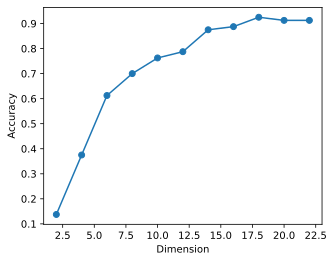

<Figure size 432x288 with 0 Axes>

In [39]:
dimension = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

test_acc = []
for d in dimension:
    pca = decomposition.PCA(n_components=d)
    pca.fit(trainX)
    trainXpca = pca.transform(trainX)
    testXpca = pca.transform(testX)
    lr = linear_model.LogisticRegression(max_iter=1000,C=0.25118864315095796)
    lr.fit(trainXpca, trainY)
    predY = lr.predict(testXpca)
    print("Dimension: ", d)
    acc = metrics.accuracy_score(testY, predY)
    test_acc.append(acc)
    print("Accuracy: ", acc)

plt.figure(figsize=(5,4))
plt.plot(dimension, test_acc, 'o-')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.show()
plt.tight_layout()

_What is the best number of components?  View the basis images to see what they look like_
- **INSERT YOUR ANSWER HERE**

+ The best number of components is 18
+ To the basis images,their features are more distributed broad, especially in the last few images.
+ With the increasing of the number of component, the image are more likely to human face.

In [ ]:
### INSERT YOUR CODE HERE

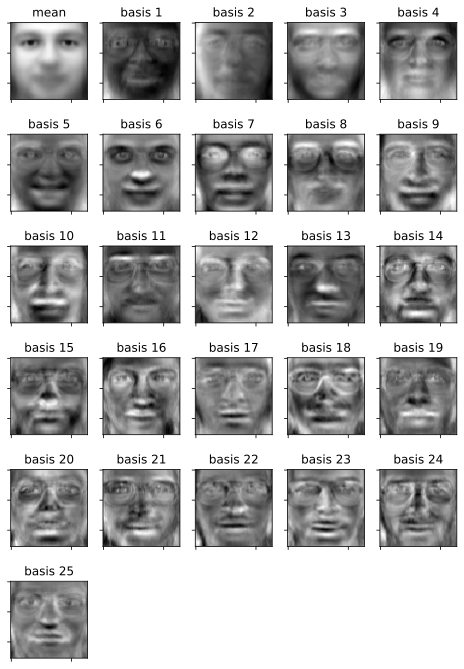

In [21]:
pca_best = decomposition.PCA(n_components=25)
pca_best.fit(trainX)
plot_basis(pca_best, imgsize)

# Linear Dimensionality Reduction - NMF
Now we will repeat the experiment using non-negative matrix factorization instead of PCA.  Perform NMF with 9 components and visualize the basis images.

In [ ]:
### INSERT YOUR CODE HERE

c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


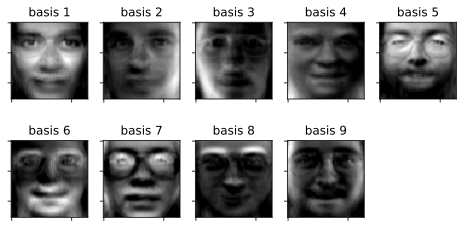

In [22]:
nmf = decomposition.NMF(n_components=9)
nmf.fit(trainX)
plot_basis(nmf, imgsize)

_What do the basis images look like?  What is the main difference with the PCA basis images?_
- **INSERT YOUR ANSWER HERE**

+ First, these basis image are with more contrast level and more clear, like the basis 5, using NMF than PCA
+ Second, the basis images are much darker using NMF than PCA
+ Third, the basis images seem to have stronger interests on different facial areas using NMF than the PCA
+ Last, the basis images look more like reasonable human faces using NMF than the PCA.

## Finding the best number of components
Now find the number of components that gives the best test accuracy.  Use the same type of classifier that you used in the previous experiment.  Use cross-validation to select the hyperparameters of the classifier.  You do not need to do cross-validation for the number of components.

In [ ]:
### INSERT YOUR CODE HERE

In [25]:
nmf = decomposition.NMF(n_components=9)
nmf.fit(trainX)
trainXnmf = nmf.transform(trainX)
testXnmf = nmf.transform(testX)

paragrid_lr = {'C': logspace(-3,3,6)}
lr_cv = model_selection.GridSearchCV(linear_model.LogisticRegression(max_iter=1000), paragrid_lr, cv=5)
lr_cv.fit(trainXnmf, trainY)
print(lr_cv.best_params_)
print('train accuracy: ',lr_cv.best_score_)
predY = lr_cv.predict(testXnmf)
print('test accuracy: ',metrics.accuracy_score(testY, predY))

c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


{'C': 63.0957344480193}
train accuracy:  0.8
test accuracy:  0.75


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Dimension:  2
Accuracy:  0.125


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Dimension:  4
Accuracy:  0.3625


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Dimension:  6
Accuracy:  0.5875


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Dimension:  8
Accuracy:  0.725


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Dimension:  10
Accuracy:  0.825


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Dimension:  12
Accuracy:  0.825


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Dimension:  14
Accuracy:  0.8875


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Dimension:  16
Accuracy:  0.8875


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Dimension:  18
Accuracy:  0.9375


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Dimension:  20
Accuracy:  0.9125


c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Dimension:  22
Accuracy:  0.925


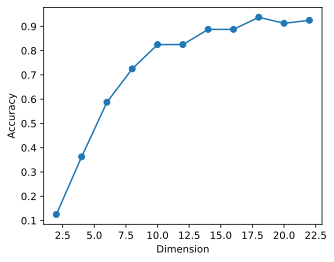

<Figure size 432x288 with 0 Axes>

In [38]:
dimension = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
test_acc = []
for d in dimension:
    nmf = decomposition.NMF( n_components=d)
    nmf.fit(trainX)
    trainXnmf = nmf.transform(trainX)
    testXnmf = nmf.transform(testX)
    lr = linear_model.LogisticRegression(max_iter=1000,C=63.0957344480193)
    lr.fit(trainXnmf, trainY)
    predY = lr.predict(testXnmf)
    print("Dimension: ", d)
    acc = metrics.accuracy_score(testY, predY)
    test_acc.append(acc)
    print("Accuracy: ", acc)

plt.figure(figsize=(5,4))
plt.plot(dimension, test_acc, 'o-')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.show()
plt.tight_layout()

_Which number of components give the best test result? How does the accuracy compare to the best PCA result?  Why is NMF or PCA better?_
- **INSERT YOUR ANSWER HERE**

+ When number of components = 18, the accuracy is the best.
+ NMF accuracy = 0.9375 > PCA accuracy = 0.925

### To the reason of NMF better:
+ The NMF method is better. Because the NMF finds the non-negative features, which gurantee the negative feature values cannot infulence the classifier to draw a conclusion that one image.

In [ ]:
### INSERT YOUR CODE HERE

# Non-Linear Dimensionality Reduction - KPCA
Now we will use KPCA to perform non-linear dimensionality reduction on the data  before training the classifier.  Run KPCA on the data using 10 principal components.  Use the RBF kernel with gamma=0.001.

In [ ]:
### INSERT YOUR CODE HERE ###

In [48]:
kpca = decomposition.KernelPCA(n_components=10, kernel='rbf', gamma=0.001)
kpca.fit(trainX)

KernelPCA(gamma=0.001, kernel='rbf', n_components=10)

The below function will plot the basis vectors of KPCA. Run the next 2 cells to view the PCs.  The kernel PCs are a combination of similarities to points in the training set.  The PCs are visualized by showing the top 5 positive and negative training examples, along with their coefficient $\alpha_i$.

In [33]:
def plot_kbasis(model, imgsize, X):
    KK = model.n_components
    alphas = model.eigenvectors_.T
    minmax = 5
    
    py = KK
    px = minmax*2
    for i in range(KK):
        # sort alphas
        inds = argsort(alphas[i,:])

        myi = r_[arange(-1,-minmax-1,-1), arange(minmax-1,-1,-1)]
        myinds = inds[myi]
        
        for j,jj in enumerate(myinds):
            plt.subplot(py,px,(j+1)+i*px)
            plt.imshow(X[jj,:].reshape(imgsize), interpolation='nearest')
            plt.gray()
            if alphas[i,jj]<0:
                mycol = 'b'
            else:
                mycol = 'r'
            plt.title("{:.3f}".format(alphas[i,jj]), fontsize=7, color=mycol)
            if (j==0):
                plt.ylabel('PC' + str(i+1))
            plt.xticks([])
            plt.yticks([])

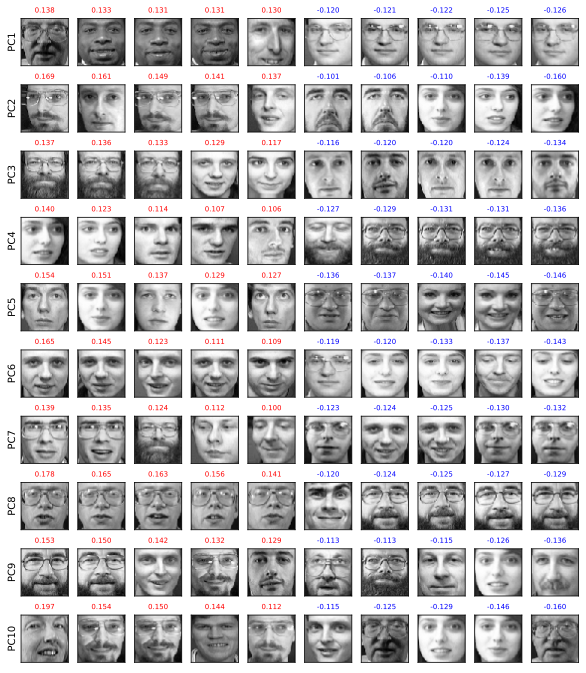

In [34]:
# run the function
plt.figure(figsize=(10,12))
plot_kbasis(kpca, imgsize, trainX)

In [50]:
kpca = decomposition.KernelPCA(n_components=10, kernel='rbf', gamma=0.001)
kpca.fit(trainX)
trainXkpca = kpca.transform(trainX)
testXkpca = kpca.transform(testX)

paragrid = {'C': logspace(-3,3,6)}
lr_cv = model_selection.GridSearchCV(linear_model.LogisticRegression(max_iter=1000), paragrid, cv=5)
lr_cv.fit(trainXkpca, trainY)
print(lr_cv.best_params_)  
print('train accuracy: ',lr_cv.best_score_)
predY = lr_cv.predict(testXkpca)
print('test accuracy: ',metrics.accuracy_score(testY, predY))


{'C': 1000.0}
train accuracy:  0.875
test accuracy:  0.825


_What is the interpretation for the KPCA basis?  What kind of faces do some of the PCs prefer?_
- **INSERT YOUR ANSWER HERE**

### To the interpretation for KPCA basis:
+ I think the KPCA each basis try to model the differences between the facial images from different persons:
  
Here are some PCs attention:
+ PC1 might try to distinguish faces by different skin colors
+ PC2 might try to distinguish faces by the direction of head
+ PC3 and PC4 might try to distinguish faces by the beard apperance
+ PC5 might try to distinguish faces by the shape of nose or the size of mouth openning.
+ PC6 might try to distinguish faces by the eyesight direction and the size of eyes.
+ PC7 not sure
+ PC8 might try to distinguish faces by the density of eyebrow.
+ PC9 might try to distinguish faces by the eyssight direction.
+ PC10 not sure 



## Finding the best kernel and best number of components
Now try different kernels (poly, RBF, etc), kernel parameters, and number of components to get the best test accuracy.  Train a classifier for each one and see which dimension gives the best testing accuracy.  Make a plots of number of components vs. test accuracy.

In [ ]:
### INSERT YOUR CODE HERE

c:\cityu_life\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\cityu_life\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

gamma:  0.001 max component:  22 max accuracy:  0.95
gamma:  0.01 max component:  22 max accuracy:  0.9625
gamma:  0.1 max component:  20 max accuracy:  0.925
gamma:  1 max component:  18 max accuracy:  0.9125
gamma:  10 max component:  22 max accuracy:  0.8875
gamma:  100 max component:  16 max accuracy:  0.8625


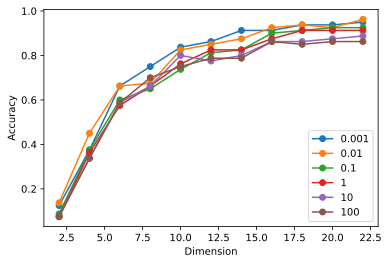

<Figure size 432x288 with 0 Axes>

In [56]:
gamma_l = [0.001, 0.01, 0.1, 1, 10, 100]
component = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
test_dict = {}

for g in gamma_l:
    test_acc = []
    for d in component:
        kpca = decomposition.KernelPCA(n_components=d, kernel='poly', gamma=g)
        kpca.fit(trainX)
        trainXkpca = kpca.transform(trainX)
        testXkpca = kpca.transform(testX)
        lr = linear_model.LogisticRegression(max_iter=1000, C=1000)
        lr.fit(trainXkpca, trainY)
        predY = lr.predict(testXkpca)
        acc = metrics.accuracy_score(testY, predY)
        test_acc.append(acc)
    test_dict[g] = test_acc

for k, v in test_dict.items():
    max_component  = component[v.index(max(v))]
    print('gamma: ', k, 'max component: ', max_component, 'max accuracy: ', max(v))


for g in gamma_l:
    plt.plot(component, test_dict[g], 'o-', label=g)
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.tight_layout()


gamma:  0.001 max component:  20 max accuracy:  0.9375
gamma:  0.003981071705534973 max component:  20 max accuracy:  0.925
gamma:  0.015848931924611134 max component:  22 max accuracy:  0.9
gamma:  0.0630957344480193 max component:  20 max accuracy:  0.475
gamma:  0.25118864315095796 max component:  8 max accuracy:  0.0375
gamma:  1.0 max component:  12 max accuracy:  0.0125


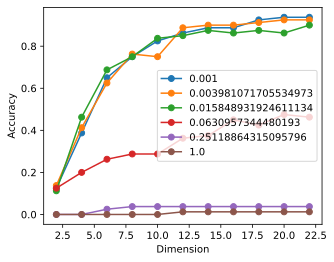

<Figure size 432x288 with 0 Axes>

In [59]:

gamma_l = logspace(-3, 0, 6)
component = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
test_dict = {}

for g in gamma_l:
    test_acc = []
    for d in component:
        kpca = decomposition.KernelPCA(n_components=d, kernel='rbf', gamma=g)
        kpca.fit(trainX)
        trainXkpca = kpca.transform(trainX)
        testXkpca = kpca.transform(testX)
        lr = linear_model.LogisticRegression(max_iter=1000, C=1000)
        lr.fit(trainXkpca, trainY)
        predY = lr.predict(testXkpca)
        acc = metrics.accuracy_score(testY, predY)
        test_acc.append(acc)
    test_dict[g] = test_acc

for k,v in test_dict.items():
    max_component  = component[v.index(max(v))]
    print('gamma: ', k, 'max component: ', max_component, 'max accuracy: ', max(v))

plt.figure(figsize=(5,4))
for key in test_dict:
    plt.plot(component, test_dict[key], 'o-', label=key)
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.tight_layout()


_What is the best kernel and number of components?_
- **INSERT YOUR ANSWER HERE**

+ The poly kernel with 22 components get the best performance.

*Which dimensionality reduction method performs the best for classification? Why?*
- **INSERT YOUR ANSWER HERE**

+ According to the result, maybe the KPCA > NMF > PCA.
+ some non-linear serparable problem for reduction dimenstion may be solved by using kernel PCA.

# De-noising with dimensionality reduction

In this section, we will  use dimensionality reduction for denoising a face image. Given a noisy image $\mathbf{x}$, we first compute the low-dimensional representation $\mathbf{w}$, e.g., using PCA. Then given $\mathbf{w}$, we reconstruct the image $\hat{\mathbf{x}}$ from the PCA/NMF basis.  In sklearn, the reconstruction step can be achieved using the `inverse_transform()` method of the PCA or NMF classes.

Train a PCA or NMF model using a large number of components (e.g., 100) on the face dataset, and then test it for denoising. For the noisy images, you can try different types of noise, such as:
- additive noise (using `random.normal`)
- salt & pepper noise (using `random.binomial`)
- masking out part of the image (the masked out part can be replaced with black, gray, or white).


for evaluation of the reconstruction or denoising result you can use "peak signal to noise ratio", which is implemented in skimage as `skimage.metrics.peak_signal_noise_ratio` or `skimage.measure.compare_psnr` (on older versions).

In [82]:
import skimage

In [ ]:
### INSERT YOUR CODE HERE

In [70]:
2*random.normal(size=testX.shape)/50

array([[ 0.02495377, -0.04511378, -0.02762647, ...,  0.01625947,
         0.01637143,  0.00458193],
       [ 0.10810272,  0.10915431,  0.01245627, ..., -0.00157188,
         0.02802506,  0.03003811],
       [-0.02548544,  0.05617185,  0.01959426, ...,  0.00238397,
         0.02555857, -0.05474581],
       ...,
       [ 0.03064111,  0.00729445, -0.06488356, ...,  0.04164254,
        -0.03175532, -0.05095679],
       [-0.05036096,  0.01561047, -0.03722546, ..., -0.05715197,
         0.02116596, -0.00544529],
       [ 0.04219487, -0.02769217, -0.00106382, ...,  0.0015742 ,
         0.00399949, -0.06175474]])

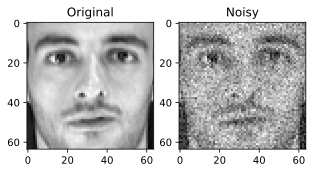

In [109]:
noisyX = trainX.copy()
noisyXt = testX.copy()

for i in range(noisyX.shape[0]):
    noisyX[i,:] = skimage.util.random_noise(noisyX[i,:].reshape(imgsize), mode='gaussian', var=0.01).reshape(-1)
for i in range(noisyXt.shape[0]):
    noisyXt[i,:] = skimage.util.random_noise(noisyXt[i,:].reshape(imgsize), mode='gaussian', var=0.01).reshape(-1)

im = trainX[0,:].reshape(imgsize)
imn = noisyX[0,:].reshape(imgsize)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(im, interpolation='nearest')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imn, interpolation='nearest')
plt.title('Noisy')
plt.show()

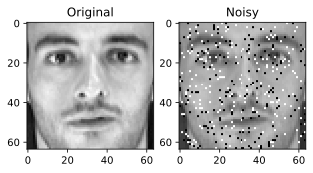

In [106]:
noisyX_salt = trainX.copy()
noisyXt_salt = testX.copy()

for i in range(noisyX_salt.shape[0]):
    noisyX_salt[i,:] = skimage.util.random_noise(noisyX_salt[i,:].reshape(imgsize), mode='s&p', amount=0.1).reshape(-1)
for i in range(noisyXt_salt.shape[0]):
    noisyXt_salt[i,:] = skimage.util.random_noise(noisyXt_salt[i,:].reshape(imgsize), mode='s&p', amount=0.1).reshape(-1)

im = trainX[0,:].reshape(imgsize)
imn = noisyX_salt[0,:].reshape(imgsize)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(im, interpolation='nearest')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imn, interpolation='nearest')
plt.title('Noisy')
plt.show()


In [126]:
trainX[0,:].reshape(imgsize)

array([[0.48760331, 0.55785125, 0.57438016, ..., 0.61157024, 0.59504133,
        0.59090906],
       [0.52479339, 0.57024795, 0.57438016, ..., 0.61570245, 0.59917355,
        0.59504133],
       [0.54132229, 0.58264464, 0.57851237, ..., 0.61570245, 0.60330576,
        0.59504133],
       ...,
       [0.24793388, 0.24380165, 0.24793388, ..., 0.18595041, 0.18181819,
        0.2107438 ],
       [0.24793388, 0.24793388, 0.24793388, ..., 0.17768595, 0.18595041,
        0.20661157],
       [0.24793388, 0.24380165, 0.23553719, ..., 0.17768595, 0.19008264,
        0.20247933]])

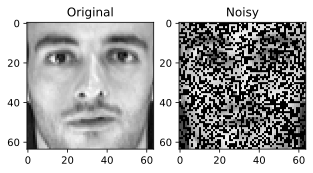

In [123]:
nositX_mask = trainX.copy()
nositXt_mask = testX.copy()

# masking out part of the image
for i in range(nositX_mask.shape[0]):
    mask = random.randint(0,2,size=imgsize)
    nositX_mask[i,:] = nositX_mask[i,:]*mask.reshape(-1)
for i in range(nositXt_mask.shape[0]):
    mask = random.randint(0,2,size=imgsize)
    nositXt_mask[i,:] = nositXt_mask[i,:]*mask.reshape(-1)

im = trainX[0,:].reshape(imgsize)
imn = nositX_mask[0,:].reshape(imgsize)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(im, interpolation='nearest')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imn, interpolation='nearest')
plt.title('Noisy')
plt.show()

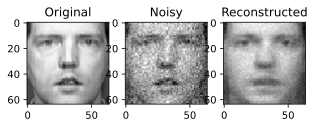

In [115]:
pca = decomposition.PCA(n_components=100)
pca.fit(noisyX)

im = testX[0,:].reshape(imgsize)
imn = noisyXt[0,:].reshape(imgsize)
imr = pca.inverse_transform(pca.transform(noisyXt[0,:].reshape(1,-1))).reshape(imgsize)

plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(im, interpolation='nearest')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(imn, interpolation='nearest')
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(imr, interpolation='nearest')
plt.title('Reconstructed')
plt.show()


In [117]:
print('Original vs. Noisy', skimage.metrics.peak_signal_noise_ratio(testX, noisyXt))

print('Original vs. Reconstructed', skimage.metrics.peak_signal_noise_ratio(testX, pca.inverse_transform(pca.transform(noisyXt))))

print('improvement ratio is:', (skimage.metrics.peak_signal_noise_ratio(testX, pca.inverse_transform(pca.transform(noisyXt))) - skimage.metrics.peak_signal_noise_ratio(testX, noisyXt))/skimage.metrics.peak_signal_noise_ratio(testX, noisyXt))

Original vs. Noisy 20.047938988587816
Original vs. Reconstructed 23.42963276566296
improvement ratio is: 0.16868037053585178


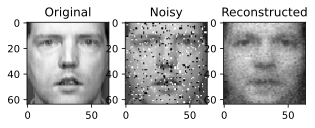

In [107]:
pca = decomposition.PCA(n_components=100)
pca.fit(noisyX_salt)

im = testX[0,:].reshape(imgsize)
imn = noisyXt_salt[0,:].reshape(imgsize)
imr = pca.inverse_transform(pca.transform(noisyXt_salt[0,:].reshape(1,-1))).reshape(imgsize)

plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(im, interpolation='nearest')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(imn, interpolation='nearest')
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(imr, interpolation='nearest')
plt.title('Reconstructed')
plt.show()



In [118]:
print('Original vs. Noisy', skimage.metrics.peak_signal_noise_ratio(testX, noisyXt_salt))


print('Original vs. Reconstructed', skimage.metrics.peak_signal_noise_ratio(testX, pca.inverse_transform(pca.transform(noisyXt_salt))))

print('improvement ratio is:', (skimage.metrics.peak_signal_noise_ratio(testX, pca.inverse_transform(pca.transform(noisyXt_salt))) - skimage.metrics.peak_signal_noise_ratio(testX, noisyXt_salt))/skimage.metrics.peak_signal_noise_ratio(testX, noisyXt_salt))

Original vs. Noisy 15.470684365513836
Original vs. Reconstructed 22.810781250889637
improvement ratio is: 0.4744519836328527


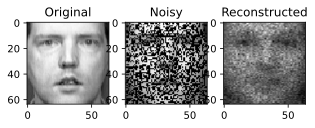

In [113]:
pca = decomposition.PCA(n_components=100)
pca.fit(nositX_mask)

im = testX[0,:].reshape(imgsize)
imn = nositXt_mask[0,:].reshape(imgsize)
imr = pca.inverse_transform(pca.transform(nositXt_mask[0,:].reshape(1,-1))).reshape(imgsize)

plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(im, interpolation='nearest')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(imn, interpolation='nearest')
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(imr, interpolation='nearest')
plt.title('Reconstructed')
plt.show()


In [119]:
print('Original vs. Noisy', skimage.metrics.peak_signal_noise_ratio(testX, nositXt_mask))

print('Original vs. Reconstructed', skimage.metrics.peak_signal_noise_ratio(testX, pca.inverse_transform(pca.transform(nositXt_mask))))

print('improvement ratio is:', (skimage.metrics.peak_signal_noise_ratio(testX, pca.inverse_transform(pca.transform(nositXt_mask))) - skimage.metrics.peak_signal_noise_ratio(testX, nositXt_mask))/skimage.metrics.peak_signal_noise_ratio(testX, nositXt_mask))

Original vs. Noisy 7.829020749318709
Original vs. Reconstructed 10.660122699646086
improvement ratio is: 0.3616163554776302


_Which kind of noise can be handled well by linear dimensionality reduction? Why?_
- **INSERT YOUR ANSWER HERE**

According to the result of peak signal noise ratio and the performance improvement after the reconstruction.

I think the noise of salt & pepper can be handled well by linear dimensionality reduction. Because the salt & pepper noise is a kind of random noise in bionomial distribution (discrete values), which has much more variance and is not correlated with the original image. So the linear dimensionality reduction can handle it well.